In [1]:
import autograd.numpy as np
from autograd import grad

from tqdm import tqdm

import torch
from torch.autograd import Variable, Function

from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

from gaussian import gaussian
from stein_LSoperator import stein_LS

from kernels import kernels, rbf_kernel, imq_kernel, poly_kernel
from ksd import ksd
from stein_cc import stein_cc


import seaborn as sns
sns.set()

In [2]:
p_data = gaussian(dict(mu=np.array([1, 0., 0.]), sigma=np.eye(3)))
q_var = gaussian(dict(mu=np.array([0., 0., 0.]), sigma=np.eye(3)))

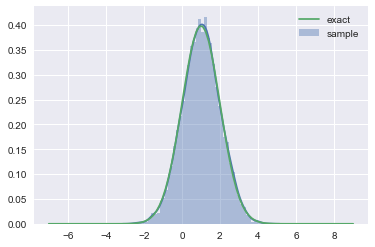

(10000, 3)

In [3]:
sam = p_data.sampler(10000)
sns.distplot(sam[:,0], label='sample')

mu = 1.0
x = np.linspace(-8 + mu, 8 + mu,100)
plt.plot(x, [p_data.density(x_, np.array([mu]), np.eye(1)) for x_ in x], label='exact')

plt.legend(loc='upper right')
plt.show()
sam.shape

In [4]:
def f(x):
    return (1 + (x**2).sum())**(-1/2)

In [5]:
test = stein_LS(dict(p=p_data, q=q_var))

In [6]:
n_samples = 2**(np.arange(5,10))
stein_val = np.array([test.Op_value(n_, f) for n_ in n_samples])

100%|██████████| 512/512 [00:00<00:00, 1707.47it/s]


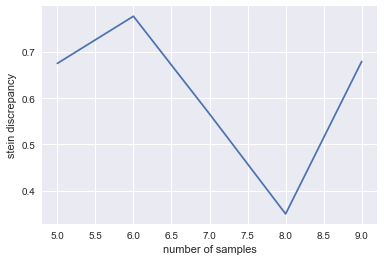

array([ 0.67518563,  0.7770629 ,  0.56599028,  0.34998348,  0.6794141 ])

In [7]:
plt.plot(np.log2(n_samples), (stein_val))
plt.xlabel('number of samples')
plt.ylabel('stein discrepancy')
plt.show()

stein_val

In [8]:

# p_data = gaussian(dict(mu=np.array([1, 0., 0.]), sigma=np.eye(3)))
# q_var = gaussian(dict(mu=np.array([0., 0., 0.]), sigma=np.eye(3)))
# test = stein_LS(dict(p=p_data, q=q_var))

# n_samples = 2**(np.arange(4,10))

# k = kernels('rbf')
# g = lambda x: k.imq(x, np.random.randn(3), c=2, beta=0.5)    
# g_1 = lambda x: k.imq(x, np.random.randn(3), c=2, beta=0.5)    
# g_2 = lambda x: k.imq(x, np.random.randn(3), c=2, beta=0.5)    

# stein_val = np.array([test.Op_value(n_, g) for n_ in n_samples])
# stein_val_1 = np.array([test.Op_value(n_, g_1) for n_ in n_samples])
# stein_val_2 = np.array([test.Op_value(n_, g_2) for n_ in n_samples])


# stein_sum = (stein_val + stein_val_1 + stein_val_2)/3

# plt.plot(np.log2(n_samples), (stein_val), label='sample 1')
# plt.plot(np.log2(n_samples), (stein_val_1), label='sample 2')
# plt.plot(np.log2(n_samples), (stein_val_2), label='sample 3')
# plt.plot(np.log2(n_samples), (stein_sum), label='average')
# plt.legend(loc='upper right')

# plt.xlabel('number of samples')
# plt.ylabel('stein discrepancy')
# plt.show()

# stein_sum

# Add kolmogorov - smirnov statistics test
# add KL divergence test
# compare to wasserstein metric

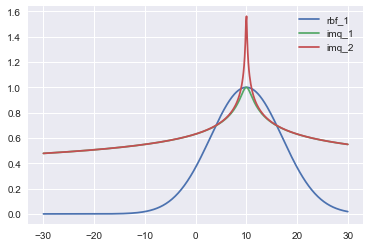

In [9]:
rbf = rbf_kernel(dict(beta=1e-2))
imq_1 = imq_kernel(dict(c=1, beta=0.1))
imq_2 = imq_kernel(dict(c=0.1, beta=0.1))

n = 1

y = np.linspace(-30, 30, 500)
# plt.plot(y, [rbf.grad_x(y = np.zeros(n), x=x_) for x_ in y], label='rbf')
# plt.legend(loc='upper right')
plt.show()

plt.plot(y, [rbf.value(np.ones(n)*10, x_) for x_ in y], label='rbf_1')
plt.plot(y, [imq_1.value(np.ones(n)*10, x_) for x_ in y], label='imq_1')
plt.plot(y, [imq_2.value(np.ones(n)*10, x_) for x_ in y], label='imq_2')

# plt.plot(y, [k.polynomial(x_, x_,  degree=2) for x_ in y], label='imq')

plt.legend(loc='upper right')
plt.show()

# Kernelized Stein Discrepancy

100%|██████████| 32/32 [00:00<00:00, 108.45it/s]


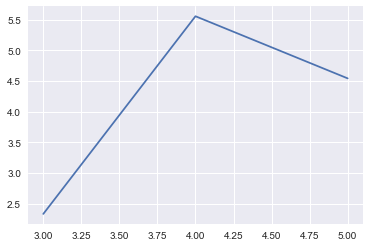

100%|██████████| 32/32 [00:00<00:00, 222.12it/s]


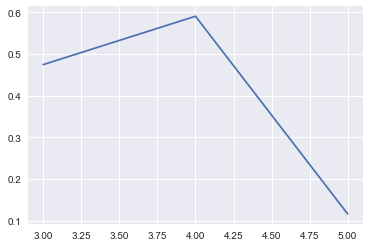

array([ 2.33383525,  5.55373267,  4.54183957])

In [10]:

sigma1 = np.array([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,3,0],
                   [0,0,0,1]])
mu1 = np.array([10. , 10. , 110. , 120.])

sigma2 = np.array([[1,0,0,0],
                   [0,20,0,0],
                   [0,0,3,1],
                   [0,0,1,1]])
mu2 = np.array([10. , 10. , 110. , 120.])

p_data = gaussian(dict(mu=mu1, sigma=sigma1))
q_var = gaussian(dict(mu=mu2, sigma=sigma2))

n_samples = 2**(np.arange(3,6))


stein_rbf = ksd('rbf', dict( p=p_data, q=q_var, beta=1e-2))
stein_val_0 = np.array([stein_rbf.Op_value(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), (stein_val_0))
plt.show()

stein_imq = ksd('imq', dict(p=p_data, q=q_var, c=1, beta=1))
stein_val_1 = np.array([stein_imq.Op_value(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), (stein_val_1))
plt.show()

stein_val_0

# Complete Conditional - kernel approach

In [11]:
sigma3 = np.array([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,3,0],
                   [0,0,0,1]])
mu3 = np.array([10. , 10. , 110. , 120.])

sigma4 = np.array([[1,0,0,0],
                   [0,2,0,0],
                   [0,0,3,0],
                   [0,0,0,1]])
mu4 = np.array([10. , 10. , 110. , 120.])

p_data = gaussian(dict(mu=mu3, sigma=sigma3))
q_var = gaussian(dict(mu=mu4, sigma=sigma4))



100%|██████████| 512/512 [00:01<00:00, 276.96it/s]


array([-0.00651246,  0.02255502,  0.31851277, -0.0516658 ,  0.03157244,
        0.03379805])

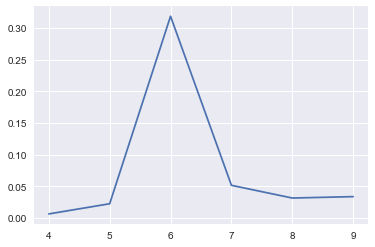

In [12]:
n_samples = 2**(np.arange(4, 10))

stein_rbf = stein_cc('rbf', dict(name='rbf', p=p_data, q=q_var, beta=1e-2))
stein_val_0 = np.array([stein_rbf.Op_value(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), abs(stein_val_0))

stein_val_0

100%|██████████| 512/512 [00:01<00:00, 308.61it/s]


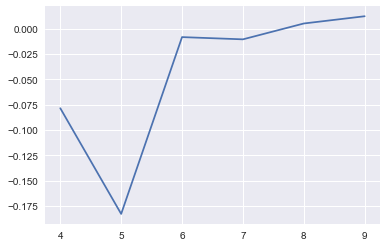

array([-0.07864924, -0.18298822, -0.00842965, -0.01064391,  0.00500679,
        0.01216005])

In [13]:
stein_imq = stein_cc('imq', dict(name='imq', p=p_data, q=p_data, beta=0.5, c=1))
stein_val_1 = np.array([stein_imq.Op_value(n_) for n_ in n_samples])
plt.plot(np.log2(n_samples), (stein_val_1))
plt.show()

stein_val_1

# Comparison of ksd and stein-cc

In [14]:
from stein_cc import stein_cc
from ksd import ksd

sigma3 = np.array([[1,0,0,0],
                   [0,1,0,0],
                   [0,0,3,0],
                   [0,0,0,1]])
mu3 = np.array([10. , 10. , 110. , 120.])

sigma4 = np.array([[10,0,0,1],
                   [0,1,0,0],
                   [0,0,3,0],
                   [1,0,0,1]])
mu4 = np.array([10. , 10. , 110. , 120.])

p_data = gaussian(dict(mu=mu3, sigma=sigma3))
q_var = gaussian(dict(mu=mu4, sigma=sigma4))

n_samples = 2**(np.arange(4, 10))

100%|██████████| 512/512 [00:01<00:00, 297.74it/s]


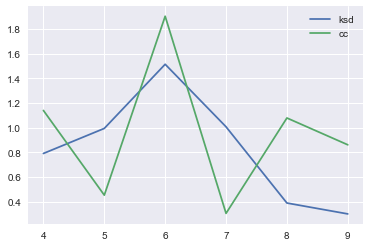

In [15]:
stein_r = ksd('rbf', dict(p=p_data, q=q_var, beta=1e-2))
stein_r_cc = stein_cc('rbf', dict(p=p_data, q=q_var, beta=1e-2))


stein_val_0 = np.array([stein_r.Op_value(n_) for n_ in n_samples])
stein_val_1 = np.array([stein_r_cc.Op_value(n_) for n_ in n_samples])


plt.plot(np.log2(n_samples), (stein_val_0), label='ksd')
plt.plot(np.log2(n_samples), (stein_val_1), label='cc')
plt.legend(loc = 'upper right')

plt.show()


100%|██████████| 512/512 [00:01<00:00, 302.17it/s]


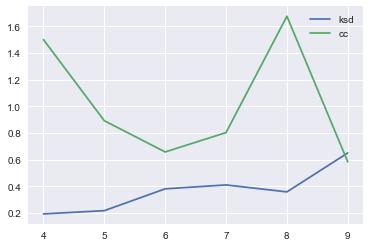

In [16]:
stein_i = ksd('imq', dict(p=p_data, q=q_var, beta=0.5, c=1))
stein_i_cc = stein_cc('imq', dict(p=p_data, q=q_var, beta=0.5, c=1))


stein_val_2 = np.array([stein_i.Op_value(n_) for n_ in n_samples])
stein_val_3 = np.array([stein_i_cc.Op_value(n_) for n_ in n_samples])


plt.plot(np.log2(n_samples), (stein_val_2), label='ksd')
plt.plot(np.log2(n_samples), (stein_val_3), label='cc')
plt.legend(loc = 'upper right')
plt.show()




#  fixes

# imq kernel gradients not fixed

# write gradient checks 

In [26]:
import torch
from torch.autograd import Variable

x = torch.ones(3)*2
type(torch.sum(-x**2))

float

In [33]:
torch.ones(4)*torch.sum(torch.ones(4))


 4
 4
 4
 4
[torch.FloatTensor of size 4]

In [43]:
x = Variable(torch.ones(4)*2)
y = Variable(torch.ones(4))

In [45]:
x + y * 2


Variable containing:
 4
 4
 4
 4
[torch.FloatTensor of size 4]